In [1]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GRU, Dense
from JenaClimate import JenaClimate
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
jena_climate = JenaClimate()
train_gen, val_gen, test_gen = jena_climate.build_generator()

In [3]:
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(None, 14)))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit_generator(
    train_gen, steps_per_epoch=500, epochs=20,
    validation_data=val_gen, validation_steps=jena_climate.val_steps,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 43s - loss: 0.3417 - val_loss: 0.2903
Epoch 2/20
 - 40s - loss: 0.3117 - val_loss: 0.2894
Epoch 3/20
 - 40s - loss: 0.2976 - val_loss: 0.2871
Epoch 4/20
 - 40s - loss: 0.2889 - val_loss: 0.2868
Epoch 5/20
 - 40s - loss: 0.2806 - val_loss: 0.2874
Epoch 6/20
 - 40s - loss: 0.2720 - val_loss: 0.2903
Epoch 7/20
 - 40s - loss: 0.2655 - val_loss: 0.2942
Epoch 8/20
 - 40s - loss: 0.2602 - val_loss: 0.3002
Epoch 9/20
 - 40s - loss: 0.2551 - val_loss: 0.3059
Epoch 10/20
 - 40s - loss: 0.2489 - val_loss: 0.2988
Epoch 11/20
 - 40s - loss: 0.2455 - val_loss: 0.3078
Epoch 12/20
 - 40s - loss: 0.2426 - val_loss: 0.3038
Epoch 13/20
 - 40s - loss: 0.2378 - val_loss: 0.3109
Epoch 14/20
 - 40s - loss: 0.2341 - val_loss: 0.3039
Epoch 15/20
 - 40s - loss: 0.2321 - val_loss: 0.3091
Epoch 16/20
 - 40s - loss: 0.2270 - val_loss: 0.3083
Epoch 17/20
 - 40s - loss: 0.2258 - val_loss: 0.3170
Epoch 18/20
 - 40s - loss: 0.2231 - val_loss: 0.3165
Epoch 1

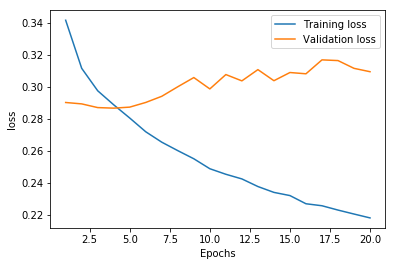

In [6]:
plot_history(history, metrics=['loss'])